In [67]:
"""  """

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_style('darkgrid')
np.set_printoptions(precision=2)
# warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, PowerTransformer
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

from sklearn.model_selection import KFold, ShuffleSplit, LeaveOneOut, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn import set_config

# 



In [68]:
"""  """

seed = 14+13*2#dia-nacimiento- + 13 * mes-nacimiento-
seed

40

### Data cleansing

In [69]:
""" Leed el fichero con pandas y almacenarlo en una variable llamada data """

data = pd.read_csv('titanic-2.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [70]:
""" Cread una variable adicional, llamada hasCabin, 
    que tome valor 0 si la columna Cabin es nula, y 1 si no lo es """
data['Cabin']=data.Cabin.fillna(0)
data['hasCabin'] = data.Cabin.apply(lambda x: 0 if x==0 else 1)# codigo-alumno
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,hasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,Mr,0


In [71]:
"""Eliminad las columnas PassengerId, Cabin, Ticket y Name de data (comando drop) """
#data = data.drop(['PassengerId', 'Cabin', 'Ticket','Name'], axis=1) este también lo hace
data = data.drop(columns=['PassengerId','Cabin', 'Ticket','Name'])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,hasCabin
0,0,3,male,22.0,1,0,7.2500,S,Mr,0
1,1,1,female,38.0,1,0,71.2833,C,Mrs,1
2,1,3,female,26.0,0,0,7.9250,S,Miss,0
3,1,1,female,35.0,1,0,53.1000,S,Mrs,1
4,0,3,male,35.0,0,0,8.0500,S,Mr,0


In [72]:
""" Modificad las variables Title, Parch y SibSp, donde Title tome los valores Mr, Mrs, Miss y Otros. 
    Y Parch y SibSp toman los valores 0, 1 o 2 (donde 2 incluye 2 o más) """

data['SibSp'] = data.SibSp.apply(lambda x: 2 if x>=2 else x)# codigo-alumno
data['Parch'] = data.Parch.apply(lambda x: 2 if x>=2 else x)# codigo-alumno
data['Title'] = data.Title.apply(lambda x: x if x in ['Mr', 'Mrs', 'Miss'] else 'Otros')# codigo-alumno

In [73]:
target = 'Survived'
cat_cols = ['Pclass', 'Sex','SibSp','Parch','Embarked','Title', 'hasCabin']
num_cols = ['Age', 'Fare']

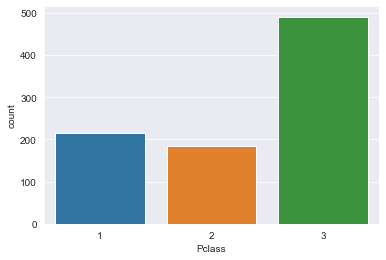

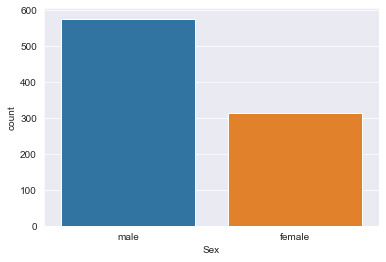

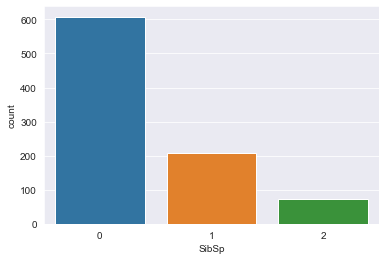

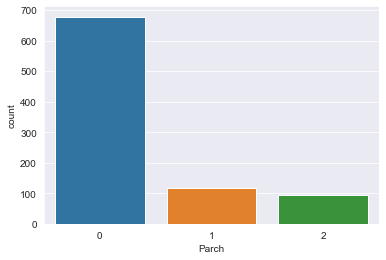

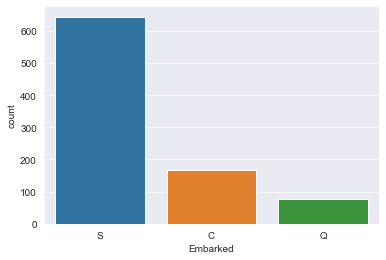

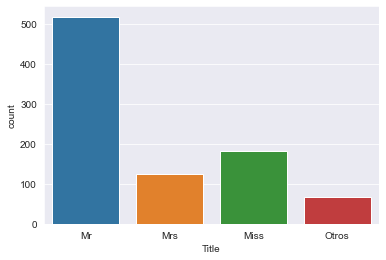

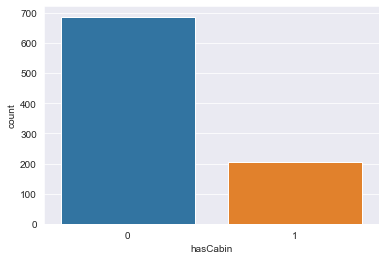

In [74]:
for col in cat_cols:
    sns.countplot(x=data[col], data=data)# así no sale el warning
    #sns.countplot(data[col])
    plt.show()
    

In [75]:
data.Embarked.isnull().sum()

2

In [76]:
""" Eliminad los dos registros cuyo valor Embarked es nulo 
    (se recomienda comprobar que se hayan eliminado correctamente) """
#data.isnull().sum()


print(data.shape)# codigo-alumno
data=data[~(data.Embarked.isnull())]
print(data.shape)# codigo-alumno

(891, 10)
(889, 10)


In [77]:
data.Embarked.isnull().sum()

0

In [78]:
""" Eliminad registros duplicados en caso de que los haya """
# codigo-alumno

# veo que son muhos registros, ¿se que podría haberse dejado la variable paseenger id sin eliminar?
print(data.duplicated().sum())
print(data.shape)
data=data.drop_duplicates()
print(data.shape)
print(data.duplicated().sum())

102
(889, 10)
(787, 10)
0


### Feature engineering

In [79]:

"""
Realizar un ColumnTransformer que lleve:
- Un KNN Imputer para 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'
- Un PowerTransformer yeo-johnson para 'Fare'
- Un OneHotEncoder para las variables 'Sex', 'Parch', 'Embarked' y 'Title'
"""
"""Missing values imputing"""
imputer = KNNImputer(n_neighbors=5)

"""Power transformer"""
transformer = PowerTransformer(method='yeo-johnson')

"""Categorical data transform"""
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

ftrs_for_imputing = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
ftrs_for_Transformer =['Fare']
cat_ftrs_OHE = ['Sex', 'Parch', 'Embarked', 'Title']


col_transformer = ColumnTransformer(
    transformers=[
        ('imputer',imputer, ftrs_for_imputing),
        ('power', transformer,ftrs_for_Transformer),
        ('cat', categorical_transformer, cat_ftrs_OHE)
    ],remainder='passthrough'
)

ctransformed = col_transformer.fit_transform(data)
ctransformed


array([[ 3. , 22. ,  1. , ...,  0. ,  0. ,  0. ],
       [ 1. , 38. ,  1. , ...,  0. ,  1. ,  1. ],
       [ 3. , 26. ,  0. , ...,  0. ,  1. ,  0. ],
       ...,
       [ 3. , 26.8,  1. , ...,  0. ,  0. ,  0. ],
       [ 1. , 26. ,  0. , ...,  0. ,  1. ,  1. ],
       [ 3. , 32. ,  0. , ...,  0. ,  0. ,  0. ]])

### Model Selection

#### Model selection + KFolds 

In [80]:
""" Realizaremos un análisis de los siguientes modelos con las siguentes features """

models = []
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier(random_state=seed)))
models.append(('NB', GaussianNB()))
models.append(('RFC', RandomForestClassifier(random_state=seed)))
models.append(('SVM', SVC()))

X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'hasCabin']]
y = data['Survived']

In [81]:
""" Para plotear los resultados utilizaremos la siguiente función """

def boxplots_algorithms(results, names):
    
    plt.figure(figsize=(8,8))
    plt.boxplot(results)
    plt.xticks(range(1,len(names)+1), names)
    plt.show()

LR: 0.792778 (0.044237)
LDA: 0.786433 (0.041065)
KNN: 0.762285 (0.051328)
DTC: 0.726842 (0.036239)
NB: 0.754706 (0.043940)
RFC: 0.775073 (0.038334)
SVM: 0.800471 (0.028789)


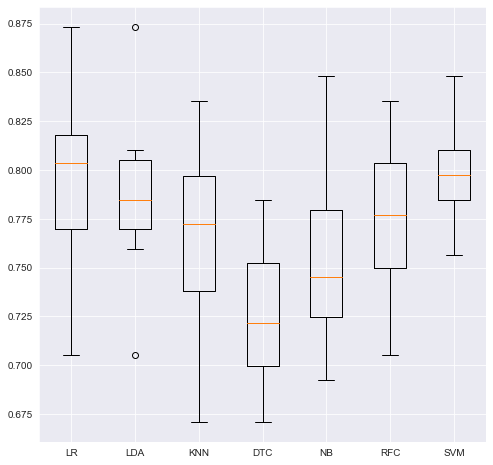

In [82]:
""" Realizad un bucle que calcule, para cada modelo,
    - Un pipeline que realice:
        1. El ColumnTransformer diseñado anteriormente
        2. Un RobustScaler a continuación y, finalmente, 
        3. Evalue cada modelo 
    - Una validación cruzada:
        1. Tipo KFolds, con 10 splits 
        2. Aleatorio con semilla y,
        3. scoring='accuracy'
     Usaremos la función boxplots_algorithms para plotear los resultados """

models = []
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier(random_state=seed)))
models.append(('NB', GaussianNB()))
models.append(('RFC', RandomForestClassifier(random_state=seed)))
models.append(('SVM', SVC()))

X = data[['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'hasCabin']]
y = data['Survived']

results = []
names = []

for name, model in models:
    transformer = col_transformer
    scaler = RobustScaler()
    pipeline = make_pipeline(transformer, scaler,model)
    
    cv_technique = KFold(n_splits=10, shuffle=True, random_state=40)
    cv_results = cross_val_score(pipeline, X,y,cv=cv_technique, scoring='accuracy')
    
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
    results.append(cv_results)
    names.append(name)
    
boxplots_algorithms(results, names)

In [83]:

set_config(display='diagram')
pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputer', KNNImputer(),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('power', PowerTransformer(),
                                                  ['Fare']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'Parch', 'Embarked',
                                                   'Title'])])),
                ('robustscaler', RobustScaler()), ('svc', SVC())])

#### Model selection + StratifiedKFolds 

LR: 0.789143 (0.033199)
LDA: 0.786530 (0.030446)
KNN: 0.776436 (0.033371)
DTC: 0.728027 (0.039114)
NB: 0.753489 (0.033916)
RFC: 0.772525 (0.037541)
SVM: 0.797971 (0.041264)


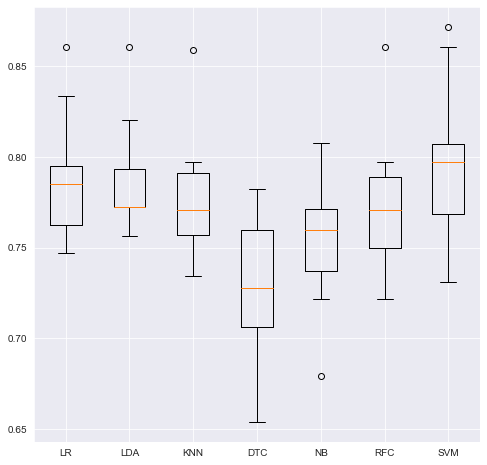

In [84]:
""" Realizad el mismo estudio de selección de variables, pero con StratifiedKFolds """

models = []
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier(random_state=seed)))
models.append(('NB', GaussianNB()))
models.append(('RFC', RandomForestClassifier(random_state=seed)))
models.append(('SVM', SVC()))

X = data[['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'hasCabin']]
y = data['Survived']

results = []
names = []

for name, model in models:
    transformer = col_transformer
    scaler = RobustScaler()
    pipeline = make_pipeline(transformer, scaler,model)
    
    cv_technique = StratifiedKFold(n_splits=10, shuffle=True, random_state=40)
    cv_results = cross_val_score(pipeline, X,y,cv=cv_technique, scoring='accuracy')
    
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
    results.append(cv_results)
    names.append(name)
    
boxplots_algorithms(results, names)

### Model Tuning

#### Tuning RandomForestClassifier + GridSearchCV + StratifiedKFold

In [85]:
""" Realizad un Tuneado del RandomForestClassifier para estimar cuál es la mejor configuración paramétrica
    Y comprobarlo con GridSearchCV """

param_grid = { 
    'model__n_estimators': [10, 20],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__max_depth' : [4,5,6,7,8],
    'model__criterion' :['gini', 'entropy']
}
model = RandomForestClassifier()# codigo-alumno

pipeline = Pipeline([('transformacion_columna', col_transformer), 
                     ('robust_scaler', scaler), 
                     ('model', model)])

cv_technique = StratifiedKFold(n_splits=10, shuffle=True, random_state=40)
grid_model = GridSearchCV(pipeline,param_grid=param_grid) # codigo-alumno
grid_model.fit(X, y)

print(grid_model.best_score_)
print(grid_model.best_estimator_)

0.8043618479400145
Pipeline(steps=[('transformacion_columna',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputer', KNNImputer(),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('power', PowerTransformer(),
                                                  ['Fare']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'Parch', 'Embarked',
                                                   'Title'])])),
                ('robust_scaler', RobustScaler()),
                ('model',
                 RandomForestClassifier(criterion='entropy', max_depth=8,
                                        max_features='log2',
             

In [86]:
grid_model.best_params_

{'model__criterion': 'entropy',
 'model__max_depth': 8,
 'model__max_features': 'log2',
 'model__n_estimators': 20}

In [87]:
grid_model.n_features_in_

9

#### Tuning RandomForestClassifier + GridSearchCV + KFold

In [88]:
""" Realizad un Tuneado del RandomForestClassifier para estimar cuál es la mejor configuración paramétrica
    Y comprobarlo con GridSearchCV """

param_grid = { 
    'model__n_estimators': [10, 20],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__max_depth' : [4,5,6,7,8],
    'model__criterion' :['gini', 'entropy']
}
model = RandomForestClassifier()# codigo-alumno

pipeline = Pipeline([('transformacion_columna', col_transformer), 
                     ('robust_scaler', scaler), 
                     ('model', model)])

cv_technique = KFold(n_splits=10, shuffle=True, random_state=40)
grid_model = GridSearchCV(pipeline,param_grid=param_grid) # codigo-alumno
grid_model.fit(X, y)

print(grid_model.best_score_)
print(grid_model.best_estimator_)

0.8043618479400146
Pipeline(steps=[('transformacion_columna',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputer', KNNImputer(),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('power', PowerTransformer(),
                                                  ['Fare']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'Parch', 'Embarked',
                                                   'Title'])])),
                ('robust_scaler', RobustScaler()),
                ('model',
                 RandomForestClassifier(max_depth=8, n_estimators=10))])


In [89]:
grid_model.best_params_

{'model__criterion': 'gini',
 'model__max_depth': 8,
 'model__max_features': 'auto',
 'model__n_estimators': 10}

In [90]:
grid_model.n_features_in_

9

In [91]:
grid_model.n_splits_

5

**El mejor modelo es el realizado con el algoritmo RandomForestClassifier y tuneado con los parámetros:

     - 'model__criterion': 'entropy',
     - 'model__max_depth': 7,
     - 'model__max_features': 'sqrt',
     - 'model__n_estimators': 20
     
sobre 5 splits**
    